In [1]:
import pandas as pd
import ast
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import TruncatedSVD, PCA

In [2]:
df = pd.read_json('dataset.json')
df.head(5)

,input,output,operation,kernel
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, ..."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, ..."
2,"[[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, ..."
3,"[[[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, ..."
4,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, ..."


In [3]:
def pca_explnation(features, n_c):
    pca = PCA(n_components=n_c, random_state=42)
    pca.fit(features)
    return pca.explained_variance_ratio_.sum()

def pca_transform(features, n_c):
    pca = PCA(n_components=n_c, random_state=42)
    pca.fit(features)
    return pca.transform(features)

In [4]:
inps = np.concatenate([np.array(i) for i in df['input'].values], axis=0)
outs = np.concatenate([np.array(i) for i in df['output'].values], axis=0)
imgs = np.concatenate([inps, outs], axis=0)
print(imgs.shape)

n, h, w = imgs.shape
imgs_flat = imgs.reshape(n, h*w)

(800, 15, 15)


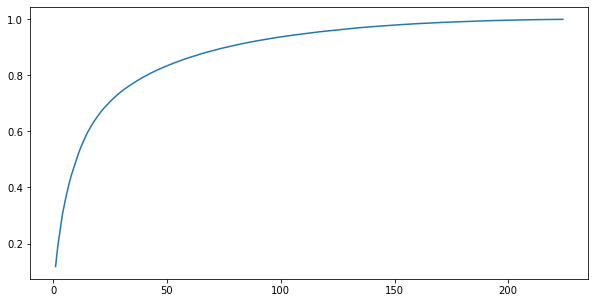

In [5]:
x = range(1, 225)
y = [pca_explnation(imgs_flat, i) for i in x]

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.show()

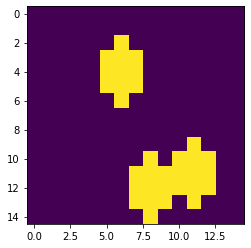

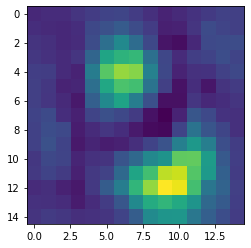

In [10]:
# test number of components
pca = PCA(n_components=20, random_state=42)
pca.fit(imgs_flat)

reduced = pca.transform(imgs_flat)
inverse = pca.inverse_transform(reduced)
inverse = inverse.reshape(n, h, w)

plt.imshow(imgs[60].reshape(h, w))
plt.show()
plt.imshow(inverse[60])
plt.show()

In [23]:
n_c = 15
reduced = pca_transform(imgs_flat, n_c)
print(reduced.shape)
reduced_inps = reduced[:len(inps)].tolist()
reduced_inps = [reduced_inps[i:i+4] for i in range(0, len(reduced_inps), 4)]
reduced_outs = reduced[len(inps):]
reduced_outs = [reduced_outs[i:i+4] for i in range(0, len(reduced_outs), 4)]

df_reduced = df.copy()
df_reduced['input_reduced'] = reduced_inps
df_reduced['output_reduced'] = reduced_outs

print(np.array(df_reduced['input_reduced'][0]).shape)
df_reduced.head(2)

(800, 15)
(4, 15)


,input,output,operation,kernel,input_reduced,output_reduced
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, ...","[[1.1171993302038905, 0.4665677283392823, -1.6...","[[1.8659102345275236, 0.15869684218817495, -1...."
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 1, 1, 1, 1]","[[0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...","[[-1.9962846075020506, -0.03489401457267722, -...","[[-1.8551173301981665, 0.028032322141751154, -..."


In [24]:
df_reduced.to_json('dataset_reduced_15.json')